# Top Instagram Influencers Data Analysis

## Step 1: Import Libraries

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

## Step 2: Data Cleaning

In [4]:

df = pd.read_csv('top_insta_influencers_data.csv')
print("Initial shape:", df.shape)
print("First 5 rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nMissing values:")
print(df.isnull().sum())
df['avg_likes'] = df['avg_likes'].str.replace('M', 'e6').str.replace('K', 'e3').astype(float)
df['new_post_avg_like'] = df['new_post_avg_like'].str.replace('M', 'e6').str.replace('K', 'e3').astype(float)
df['total_likes'] = df['total_likes'].str.replace('B', 'e9').str.replace('M', 'e6').astype(float)
df['posts'] = df['posts'].str.replace('K', 'e3').astype(float)
df['engagement_rate_60d'] = df['engagement_rate_60d'].str.replace('%', '').astype(float)
df['country'].fillna(df['country'].mode()[0], inplace=True)
df.dropna(inplace=True)
print("\nNumber of duplicates before cleaning:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Number of duplicates after cleaning:", df.duplicated().sum())
print("\nCleaned shape:", df.shape)
print("Data types:\n", df.dtypes)

Initial shape: (200, 11)
First 5 rows:
   rank channel_info  influence_score posts followers avg_likes  \
0     1    cristiano               92  3.3K    475.8M      8.7M   
1     2  kyliejenner               91  6.9K    366.2M      8.3M   
2     3     leomessi               90   890    357.3M      6.8M   
3     4  selenagomez               93  1.8K    342.7M      6.2M   
4     5      therock               91  6.8K    334.1M      1.9M   

  engagement_rate_60d new_post_avg_like total_likes        country  \
0             139.00%              6.5M       29.0B       Portugal   
1             162.00%              5.9M       57.4B  United States   
2             124.00%              4.4M        6.0B      Argentina   
3              97.00%              3.3M       11.5B  United States   
4              20.00%            665.3K       12.5B  United States   

   Follwers in numbers  
0            475800000  
1            366200000  
2            357300000  
3            342700000  
4           

## Step 3: Basic Information

In [7]:

print("\nDataset Summary:\n", df.describe())
print("Unique countries:", df['country'].nunique())


Dataset Summary:
              rank  influence_score         posts     avg_likes  \
count  199.000000       199.000000    199.000000  1.990000e+02   
mean   100.160804        81.814070   3516.884422  1.741310e+06   
std     57.825532         8.900153   3476.215047  2.100856e+06   
min      1.000000        22.000000     10.000000  6.510000e+04   
25%     50.500000        80.000000    950.000000  5.031000e+05   
50%    100.000000        84.000000   2100.000000  1.100000e+06   
75%    149.500000        86.000000   5050.000000  2.100000e+06   
max    200.000000        93.000000  17500.000000  1.540000e+07   

       engagement_rate_60d  new_post_avg_like   total_likes  \
count           199.000000       1.990000e+02  1.990000e+02   
mean            190.201005       1.214204e+06  3.670465e+09   
std             332.971910       1.861019e+06  5.573215e+09   
min               1.000000       0.000000e+00  1.830000e+07   
25%              41.000000       1.983500e+05  9.937000e+08   
50%     

## Step 4: Visualization 1 (Distribution of Influence Scores)

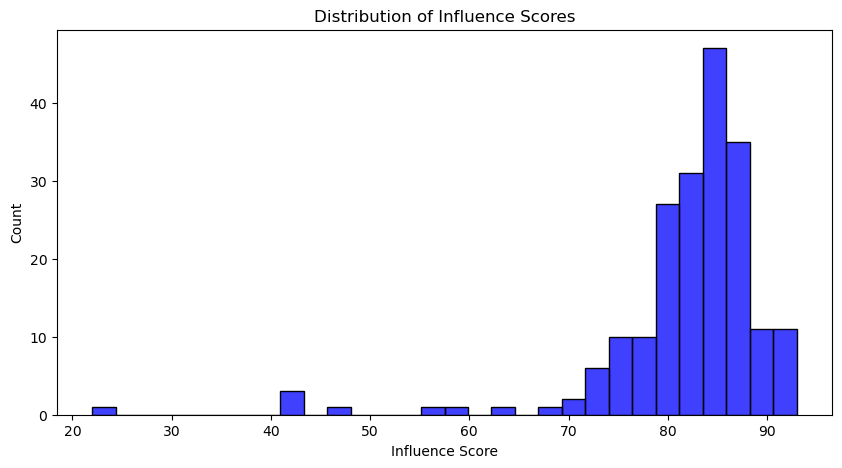

In [9]:

plt.figure(figsize=(10, 5))
sns.histplot(df['influence_score'], bins=30, color='blue')
plt.title('Distribution of Influence Scores')
plt.xlabel('Influence Score')
plt.ylabel('Count')
plt.show()

## Step 5: Visualization 2 (Top 10 Countries by Influencer Count)

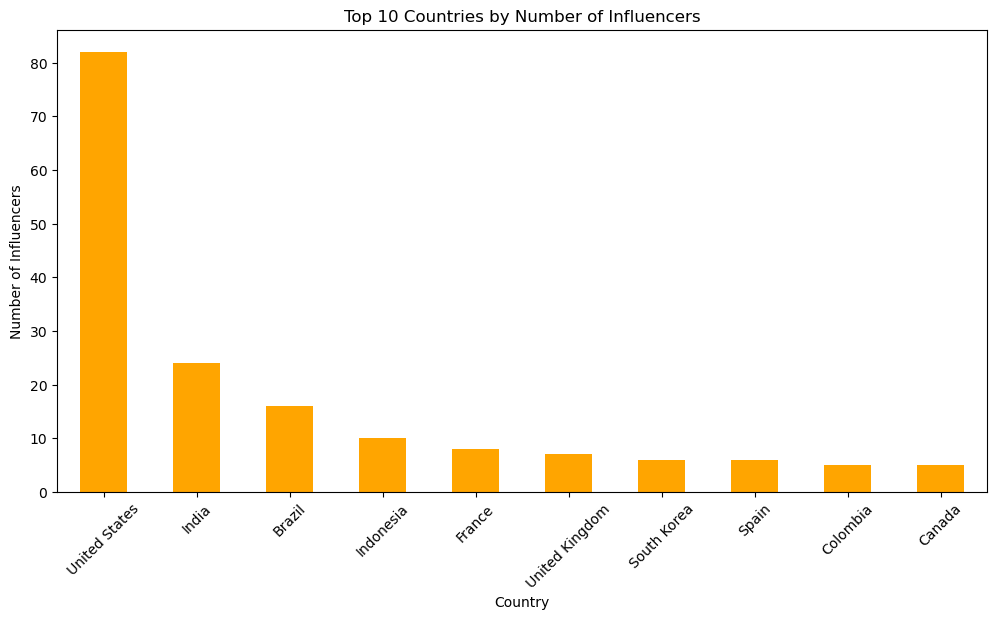

In [11]:

plt.figure(figsize=(12, 6))
df['country'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Countries by Number of Influencers')
plt.xlabel('Country')
plt.ylabel('Number of Influencers')
plt.xticks(rotation=45)
plt.show()

## Step 6: Visualization 3 (Correlation Heatmap)

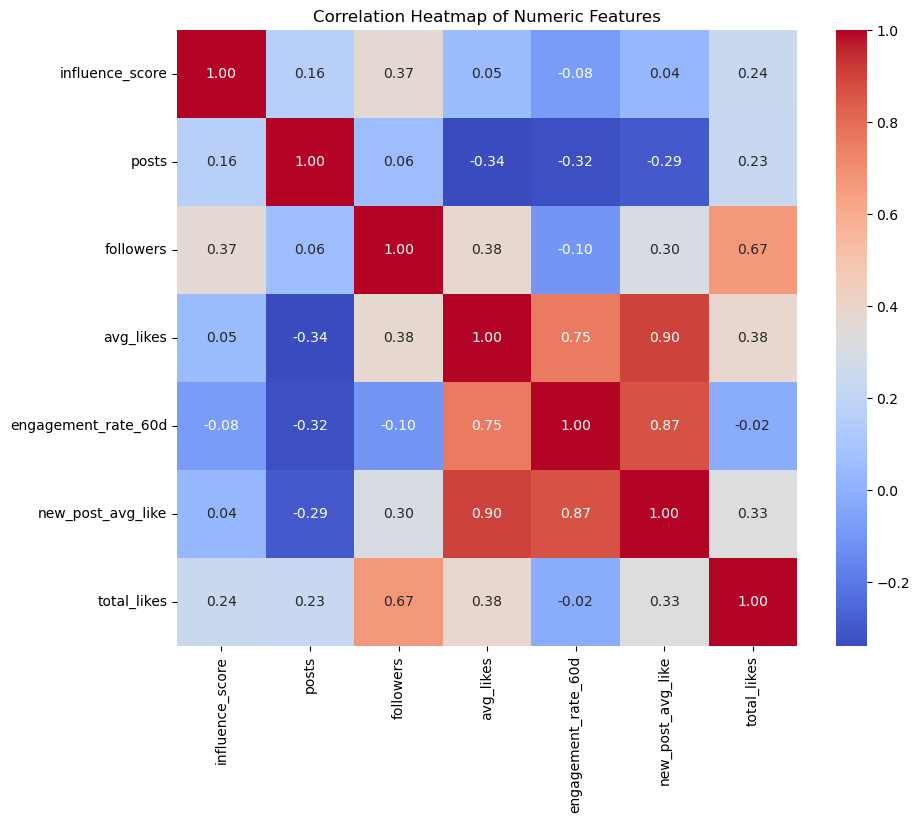

In [15]:

def convert_shorthand(value):
    if isinstance(value, str):
        value = value.strip().upper()
        try:
            if value.endswith('K'):
                return float(value[:-1]) * 1_000
            elif value.endswith('M'):
                return float(value[:-1]) * 1_000_000
            elif value.endswith('B'):
                return float(value[:-1]) * 1_000_000_000
            else:
                return float(value)
        except ValueError:
            return np.nan
    return value

# Columns that may contain shorthand values
numeric_cols = ['influence_score', 'posts', 'followers', 'avg_likes', 'engagement_rate_60d', 'new_post_avg_like', 'total_likes']

# Apply conversion
for col in numeric_cols:
    df[col] = df[col].apply(convert_shorthand)

# Step 6: Visualization 3 (Correlation Heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

## Step 7: Visualization 4 (Engagement Rate vs Followers)

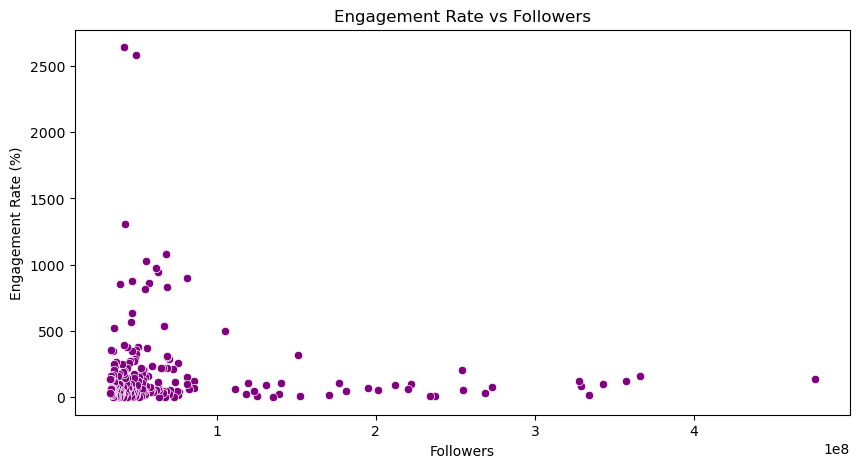

In [17]:

plt.figure(figsize=(10, 5))
sns.scatterplot(x='followers', y='engagement_rate_60d', data=df, color='purple')
plt.title('Engagement Rate vs Followers')
plt.xlabel('Followers')
plt.ylabel('Engagement Rate (%)')
plt.show()

## Step 8: Visualization 5 (Boxplot of Engagement Rate by Top Countries)

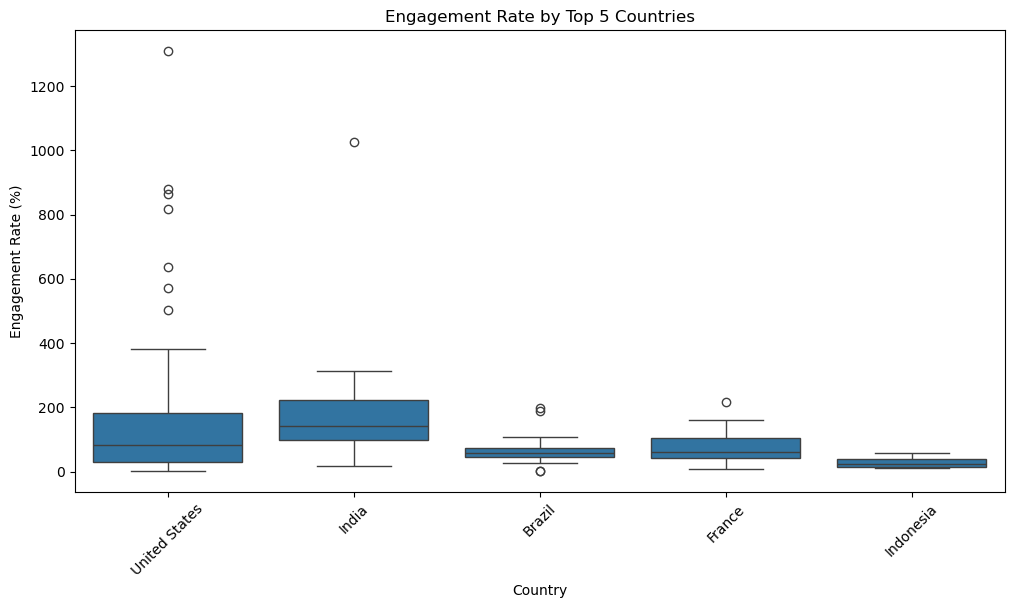

In [19]:

top_countries = df['country'].value_counts().index[:5]
plt.figure(figsize=(12, 6))
sns.boxplot(x='country', y='engagement_rate_60d', data=df[df['country'].isin(top_countries)])
plt.title('Engagement Rate by Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('Engagement Rate (%)')
plt.xticks(rotation=45)
plt.show()

## Step 9: Group Analysis (By Country)

In [94]:
country_stats = df.groupby('country').agg({
    'influence_score': 'mean',
    'followers': 'mean',
    'engagement_rate_60d': 'mean',
    'avg_likes': 'mean'
}).sort_values(by='followers', ascending=False).head(10)
print("\nTop 10 Countries by Average Stats:\n", country_stats)


Top 10 Countries by Average Stats:
                 influence_score     followers  engagement_rate_60d  \
country                                                              
Portugal              92.000000  4.758000e+08           139.000000   
Argentina             83.000000  1.482333e+08           422.666667   
United States         84.207317  1.011744e+08           160.146341   
Canada                85.400000  8.886000e+07           272.400000   
Netherlands           82.000000  8.540000e+07           131.000000   
Spain                 79.833333  7.128333e+07            70.500000   
Uruguay               78.000000  6.690000e+07           540.000000   
United Kingdom        79.714286  5.958571e+07           373.285714   
India                 81.458333  5.877083e+07           188.791667   
South Korea           79.833333  5.868333e+07          1362.833333   

                   avg_likes  
country                       
Portugal        8.700000e+06  
Argentina       3.600000e+06 

## Step 10: Visualization 6 (Average Engagement Rate by Country)

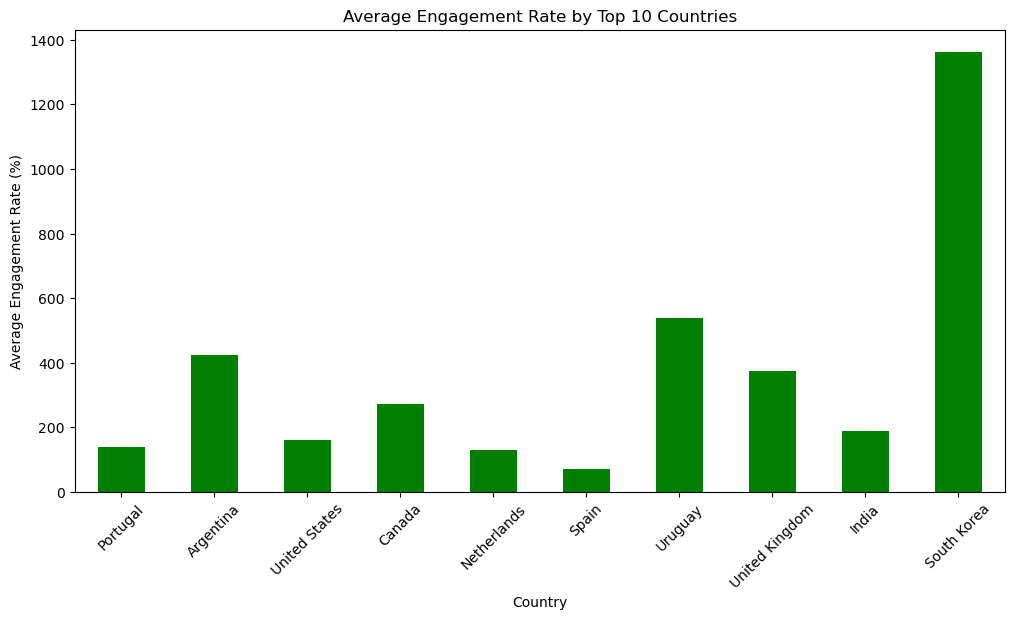

In [23]:

plt.figure(figsize=(12, 6))
country_stats['engagement_rate_60d'].plot(kind='bar', color='green')
plt.title('Average Engagement Rate by Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Average Engagement Rate (%)')
plt.xticks(rotation=45)
plt.show()

## Step 11: Outlier Detection (Engagement Rate)

In [25]:
q1 = df['engagement_rate_60d'].quantile(0.25)
q3 = df['engagement_rate_60d'].quantile(0.75)
iqr = q3 - q1
outliers = df[(df['engagement_rate_60d'] < q1 - 1.5 * iqr) | (df['engagement_rate_60d'] > q3 + 1.5 * iqr)]
print("\nNumber of outliers in Engagement Rate:", len(outliers))
print(outliers[['channel_info', 'engagement_rate_60d', 'followers']])


Number of outliers in Engagement Rate: 18
           channel_info  engagement_rate_60d    followers
32         billieeilish                502.0  105200000.0
38         lalalalisa_m                900.0   80900000.0
49       jennierubyjane                836.0   68900000.0
53       tomholland2013               1083.0   67700000.0
56   bts.bighitofficial                540.0   66900000.0
64            sooyaaa__                943.0   62900000.0
69      roses_are_rosie                972.0   61800000.0
75     milliebobbybrown                863.0   57600000.0
78               karolg               1025.0   55600000.0
83             zacefron                818.0   54500000.0
102                 thv               2580.0   49300000.0
114         harrystyles                638.0   46900000.0
118                zayn                881.0   46500000.0
120         travisscott                571.0   46200000.0
138          badbunnypr               1309.0   42100000.0
140                 j.m      

## Step 12: Visualization 7 (Outliers in Engagement Rate)

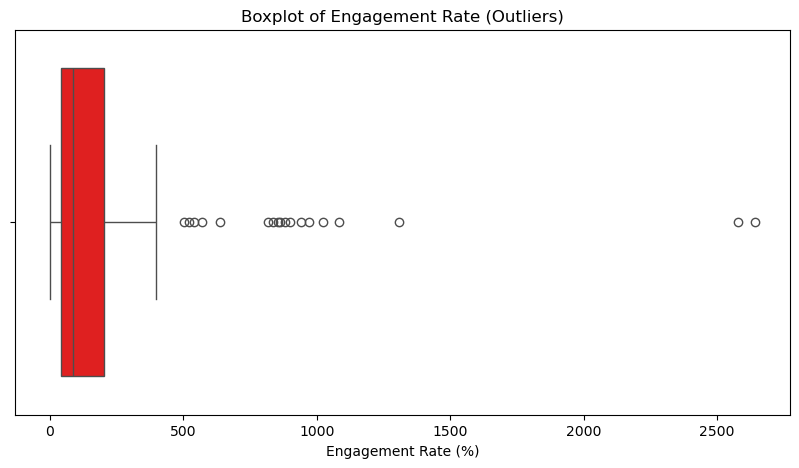

In [27]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['engagement_rate_60d'], color='red')
plt.title('Boxplot of Engagement Rate (Outliers)')
plt.xlabel('Engagement Rate (%)')
plt.show()

## Step 13: T-Test (High vs Low Followers)

In [29]:

median_followers = df['followers'].median()
high_followers = df[df['followers'] > median_followers]['engagement_rate_60d']
low_followers = df[df['followers'] <= median_followers]['engagement_rate_60d']
t_stat, p_val = stats.ttest_ind(high_followers, low_followers, equal_var=False)
print("T-statistic:", t_stat)
print("P-value:", p_val)
if p_val < 0.05:
    print("Significant difference in engagement rates.")
else:
    print("No significant difference in engagement rates.")

T-statistic: -0.4607932276323044
P-value: 0.6455534289853622
No significant difference in engagement rates.


## Step 14: Z-Test (Sample Mean Engagement Rate vs 100)

In [31]:

mean_engagement = df['engagement_rate_60d'].mean()
std_engagement = df['engagement_rate_60d'].std()
n = len(df)
z = (mean_engagement - 100) / (std_engagement / np.sqrt(n))
p_val_z = stats.norm.sf(abs(z)) * 2
print("Z-score:", z)
print("P-value:", p_val_z)
if p_val_z < 0.05:
    print("Sample mean significantly different from 100.")
else:
    print("No significant difference from 100.")

Z-score: 3.8214687950541752
P-value: 0.00013265920209174477
Sample mean significantly different from 100.


## Step 15: Regression Model (Base Features)

MSE: 31335.290922939537
R²: 0.4919493941798684
posts: 0.0076
followers: -0.0000
avg_likes: 0.0002
total_likes: -0.0000


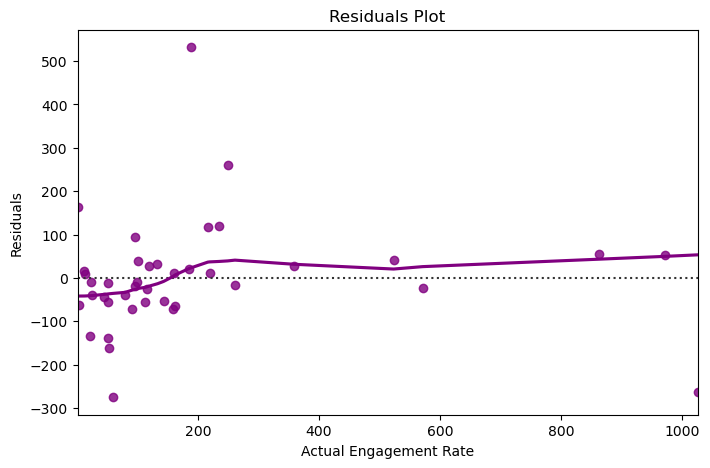

Cross-validated R² scores: [-2.15703085  0.70765655  0.90869418  0.75613842  0.27449827]
Mean CV R²: 0.09799131296187624


In [33]:

features = ['posts', 'followers', 'avg_likes', 'total_likes']
target = 'engagement_rate_60d'
reg_df = df[features + [target]].dropna()
X = reg_df[features]
y = reg_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))
for f, c in zip(features, lr_model.coef_):
    print(f"{f}: {c:.4f}")
plt.figure(figsize=(8, 5))
sns.residplot(x=y_test, y=y_pred, lowess=True, color='purple')
plt.title('Residuals Plot')
plt.xlabel('Actual Engagement Rate')
plt.ylabel('Residuals')
plt.show()
cv_r2 = cross_val_score(lr_model, X, y, cv=5, scoring='r2')
print("Cross-validated R² scores:", cv_r2)
print("Mean CV R²:", np.mean(cv_r2))

## Step 16: Feature Engineering

In [55]:

df['Log_Posts'] = np.log1p(df['posts'])
df['Log_Followers'] = np.log1p(df['followers'])
df['Log_Avg_Likes'] = np.log1p(df['avg_likes'])

avg_likes_median = df['avg_likes'].median()
df['Is_High_Avg_Likes'] = (df['avg_likes'] > avg_likes_median).astype(int)

df['Followers_Bin'] = pd.cut(df['followers'], bins=[0, 1e7, 5e7, 1e8, np.inf],
                             labels=['Small', 'Medium', 'Large', 'Very Large'])

df['Posts_Engagement_Interaction'] = df['posts'] * df['engagement_rate_60d']

followers_dummies = pd.get_dummies(df['Followers_Bin'], prefix='Followers')
df = pd.concat([df, followers_dummies], axis=1)

# ✅ Show only the new engineered features (optional)
new_cols = ['Log_Posts', 'Log_Followers', 'Log_Avg_Likes', 'Is_High_Avg_Likes',
            'Followers_Bin', 'Posts_Engagement_Interaction'] + list(followers_dummies.columns)

# ✅ Display first 5 rows of the new features
df[new_cols].head()


,Log_Posts,Log_Followers,Log_Avg_Likes,Is_High_Avg_Likes,Followers_Bin,Posts_Engagement_Interaction,Followers_Small,Followers_Small,Followers_Small,Followers_Small,...,Followers_Very Large,Followers_Very Large,Followers_Very Large,Followers_Very Large,Followers_Very Large,Followers_Very Large,Followers_Very Large,Followers_Very Large,Followers_Very Large,Followers_Very Large
0,8.101981,19.980508,15.978834,1,Very Large,458700.0,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
1,8.839422,19.718690,15.931766,1,Very Large,1117800.0,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
2,6.792344,19.694086,15.732433,1,Very Large,110360.0,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
3,7.496097,19.652366,15.640060,1,Very Large,174600.0,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
4,8.824825,19.626951,14.457365,1,Very Large,136000.0,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True


## Step 17: Regression with Feature Engineering and Country

In [59]:

engineered_features = ['Log_Posts', 'Log_Followers', 'Log_Avg_Likes', 'Is_High_Avg_Likes',
                       'Posts_Engagement_Interaction'] + list(followers_dummies.columns)
country_dummies = pd.get_dummies(df['country'], prefix='Country')
df_full = pd.concat([df, country_dummies], axis=1)
all_feats = engineered_features + list(country_dummies.columns)
reg_df_fe = df_full[all_feats + [target]].dropna()
X_fe = reg_df_fe[all_feats]
y_fe = reg_df_fe[target]
X_train_fe, X_test_fe, y_train_fe, y_test_fe = train_test_split(X_fe, y_fe, test_size=0.2, random_state=42)
fe_model = LinearRegression()
fe_model.fit(X_train_fe, y_train_fe)
y_pred_fe = fe_model.predict(X_test_fe)
print("R² Score with Feature Engineering:", r2_score(y_test_fe, y_pred_fe))

R² Score with Feature Engineering: 0.4920639220868801
